<a href="https://colab.research.google.com/github/yukti845/Neural-Networks/blob/main/Mega_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mega Case Study - Making a hybrid deep learning model

## Part-1 SOM

### Install MiniSom package

In [10]:
!pip install MiniSom

### Importing the Libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### Importing the Dataset

In [12]:
data = pd.read_csv("/content/drive/MyDrive/som_dataset/Credit_Card_Applications.csv")
x = data.iloc[:, :-1].values 
y = data.iloc[:, -1].values

### Feature Scaling

In [13]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
x = sc.fit_transform(x)

### Training the SOM

In [14]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(x)
som.train_random(data = x, num_iteration = 100)

## Visualizing the result

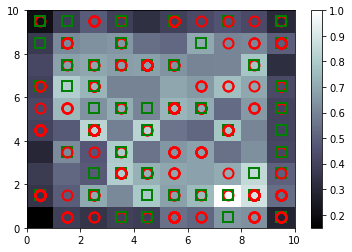

In [15]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, j in enumerate(x):
    w = som.winner(j)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

### Finding the Frauds

In [16]:
mappings = som.win_map(x)
frauds = np.concatenate((mappings[(6,8)], mappings[(5,1)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [17]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15777994
15697310
15810723
15728082
15752601
15740356
15617348
15671769
15638989
15607746
15605341
15649430
15595010


## Part-2 Going from Unsupervised to Supervised Learning

### Create Matrix of Features

In [19]:
customers = data.iloc[:, 1:].values

### Create Dependent Variable

In [21]:
is_fraud = np.zeros(len(data))
for i in range(len(data)):
  if data.iloc[i,0] in frauds:
    is_fraud[i] = 1